In [ ]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
data = pd.read_csv("finishing.csv")
print("Shape:",data.shape)
data.head()

Shape: (506, 9)


,date,quarter,team,smv,over_time,incentive,no_of_workers,actual_productivity,targeted_productivity
0,2015-01-01,Quarter1,1,3.94,2.0,0.0,8.0,0.886500,0.75
1,2015-01-01,Quarter1,2,3.94,2.0,0.0,8.0,0.755167,0.75
2,2015-01-01,Quarter1,10,3.94,2.0,0.0,8.0,0.705917,0.65
3,2015-01-01,Quarter1,8,2.90,2.0,0.0,8.0,0.676667,0.75
4,2015-01-01,Quarter1,4,3.94,2.0,0.0,18.0,0.593056,0.75


In [ ]:
# wip = 0 for all hence dropped
data["difference"] = data["actual_productivity"] - data["targeted_productivity"]
data["%diff"] = ((data["actual_productivity"] - data["targeted_productivity"])/data["targeted_productivity"])+1
data = data[data["quarter"] != "Quarter5"]
data.date = pd.to_datetime(data.date.apply(lambda x: x.strip())) # Converting date to Date-Time forma
data["week_number"] = data.date.apply(lambda x: (x.week))

In [ ]:
team_data = data.groupby("team")

In [ ]:
team_data.get_group(3).head()

,date,quarter,team,smv,over_time,incentive,no_of_workers,actual_productivity,targeted_productivity,difference,%diff,week_number
10,2015-01-03,Quarter1,3,3.94,3.25,0.0,8.0,0.945278,0.75,0.195278,1.260370,1
16,2015-01-04,Quarter1,3,4.15,3.25,0.0,8.0,0.991389,0.75,0.241389,1.321852,1
28,2015-01-05,Quarter1,3,4.15,4.00,0.0,8.0,0.875391,0.75,0.125391,1.167188,2
37,2015-01-06,Quarter1,3,4.15,3.00,0.0,10.0,0.899167,0.75,0.149167,1.198889,2
46,2015-01-07,Quarter1,3,4.15,3.00,0.0,15.0,0.830000,0.75,0.080000,1.106667,2


# Productivity trends

## General Productivity trend

### Daily


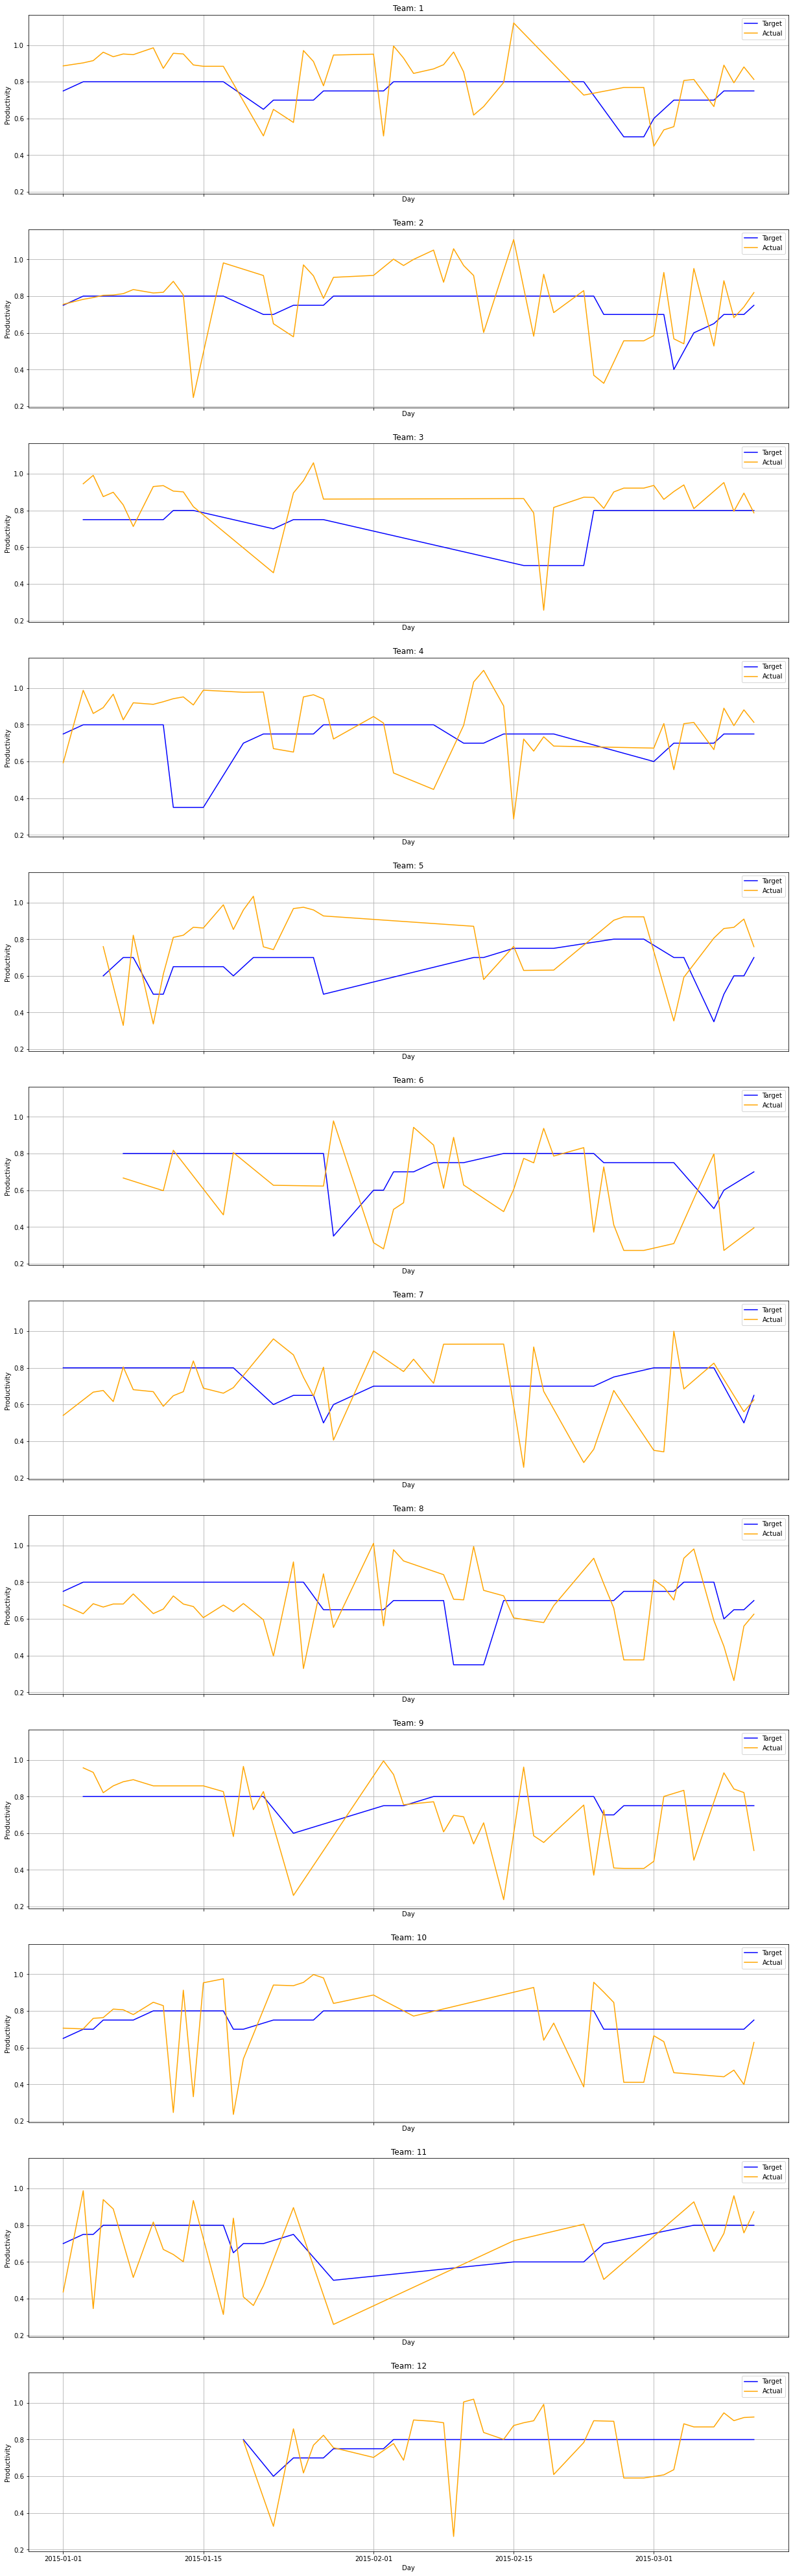

In [6]:
fig, ax = plt.subplots(12,1, sharey=True, sharex=True)
fig.set_size_inches(21, 72,  forward=True)
for team in range(1,13):
    t = team_data.get_group(team)[["date","targeted_productivity","actual_productivity"]]
    t = t.sort_values(by="date")
    
    ax[team-1].plot_date(t["date"],t["targeted_productivity"], "b")
    ax[team-1].plot_date(t["date"],t["actual_productivity"], "orange")
    ax[team-1].legend(["Target","Actual"])
    ax[team-1].grid(True)
    ax[team-1].set_title("Team: "+(str)(team))
    ax[team-1].set_xlabel("Day")
    ax[team-1].set_ylabel("Productivity")
    

### Weekly

In [7]:
fig, ax = plt.subplots(12,1, sharey=True, sharex=True)
fig.set_size_inches(21, 72,  forward=True)

for team in range(1,13):
    t = team_data.get_group(team)
    t = t.groupby("week_number")[["targeted_productivity","actual_productivity"]].agg("mean")
    
    ax[team-1].plot(t.index,t["targeted_productivity"], "b")
    ax[team-1].plot(t.index,t["actual_productivity"], "orange")
    ax[team-1].legend(["Target","Actual"])
    ax[team-1].grid(True)
    ax[team-1].set_title("Team: "+(str)(team))
    ax[team-1].set_xlabel("Week")
    ax[team-1].set_ylabel("Productivity")
    # print("Correlation for team",team,": ",t["targeted_productivity"].corr(t["actual_productivity"]))

## Most Productive Team

In [ ]:
df = data[["team","targeted_productivity","actual_productivity"]].copy()
df["diff^2"] = numpy.square(df["actual_productivity"] - df["targeted_productivity"])
df["gmean"] = 1+(df["actual_productivity"] - df["targeted_productivity"])/df["targeted_productivity"] 

In [ ]:
from scipy import stats

def geo_mean(series):
    return stats.gmean(series)

In [ ]:
df.groupby("team")["gmean"].agg(geo_mean).sort_values(ascending = False)

team
5     1.166235
3     1.145743
4     1.132860
1     1.083338
2     0.999234
12    0.986199
8     0.941084
10    0.894677
7     0.892469
9     0.880827
11    0.857487
6     0.780013
Name: gmean, dtype: float64

Most Productive are: 5,3,4,1,2

In [ ]:
df.groupby(["team"])["diff^2"].agg(mean).sort_values()

team
1     0.022631
12    0.023425
3     0.031571
2     0.034418
9     0.039148
10    0.044558
7     0.045439
11    0.046871
8     0.050113
5     0.055678
4     0.060846
6     0.072833
Name: diff^2, dtype: float64

Top 5 most consistent teams are: 1,12,3,2,9?


## Productivity across Quarters

In [ ]:
df = data.groupby(["quarter"])["targeted_productivity","actual_productivity"].agg("mean")
df

<ipython-input-12-abc288502adc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = data.groupby(["quarter"])["targeted_productivity","actual_productivity"].agg("mean")


,targeted_productivity,actual_productivity
quarter,,
Quarter1,0.747315,0.758482
Quarter2,0.738435,0.764824
Quarter3,0.741358,0.735793
Quarter4,0.721759,0.713400


Correlation: 0.7942420432583989


Text(0, 0.5, 'productivity')

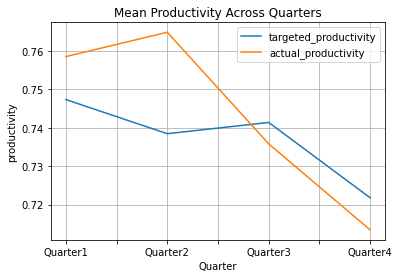

In [ ]:
print("Correlation:",df["actual_productivity"].corr(df["targeted_productivity"]))
df.plot(title = "Mean Productivity Across Quarters", grid = True)
xlabel("Quarter")
ylabel("productivity")

# Productivity across Quarters by team

In [ ]:
df_productivity = data.groupby(["team","quarter"])["targeted_productivity","actual_productivity"].agg("mean")
df_productivity.head()

<ipython-input-14-11b89a3c4b84>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_productivity = data.groupby(["team","quarter"])["targeted_productivity","actual_productivity"].agg("mean")


targeted_productivity  actual_productivity
team quarter                                             
1    Quarter1               0.750000             0.804149
     Quarter2               0.787500             0.860675
     Quarter3               0.762500             0.848522
     Quarter4               0.677778             0.788581
2    Quarter1               0.723529             0.810896

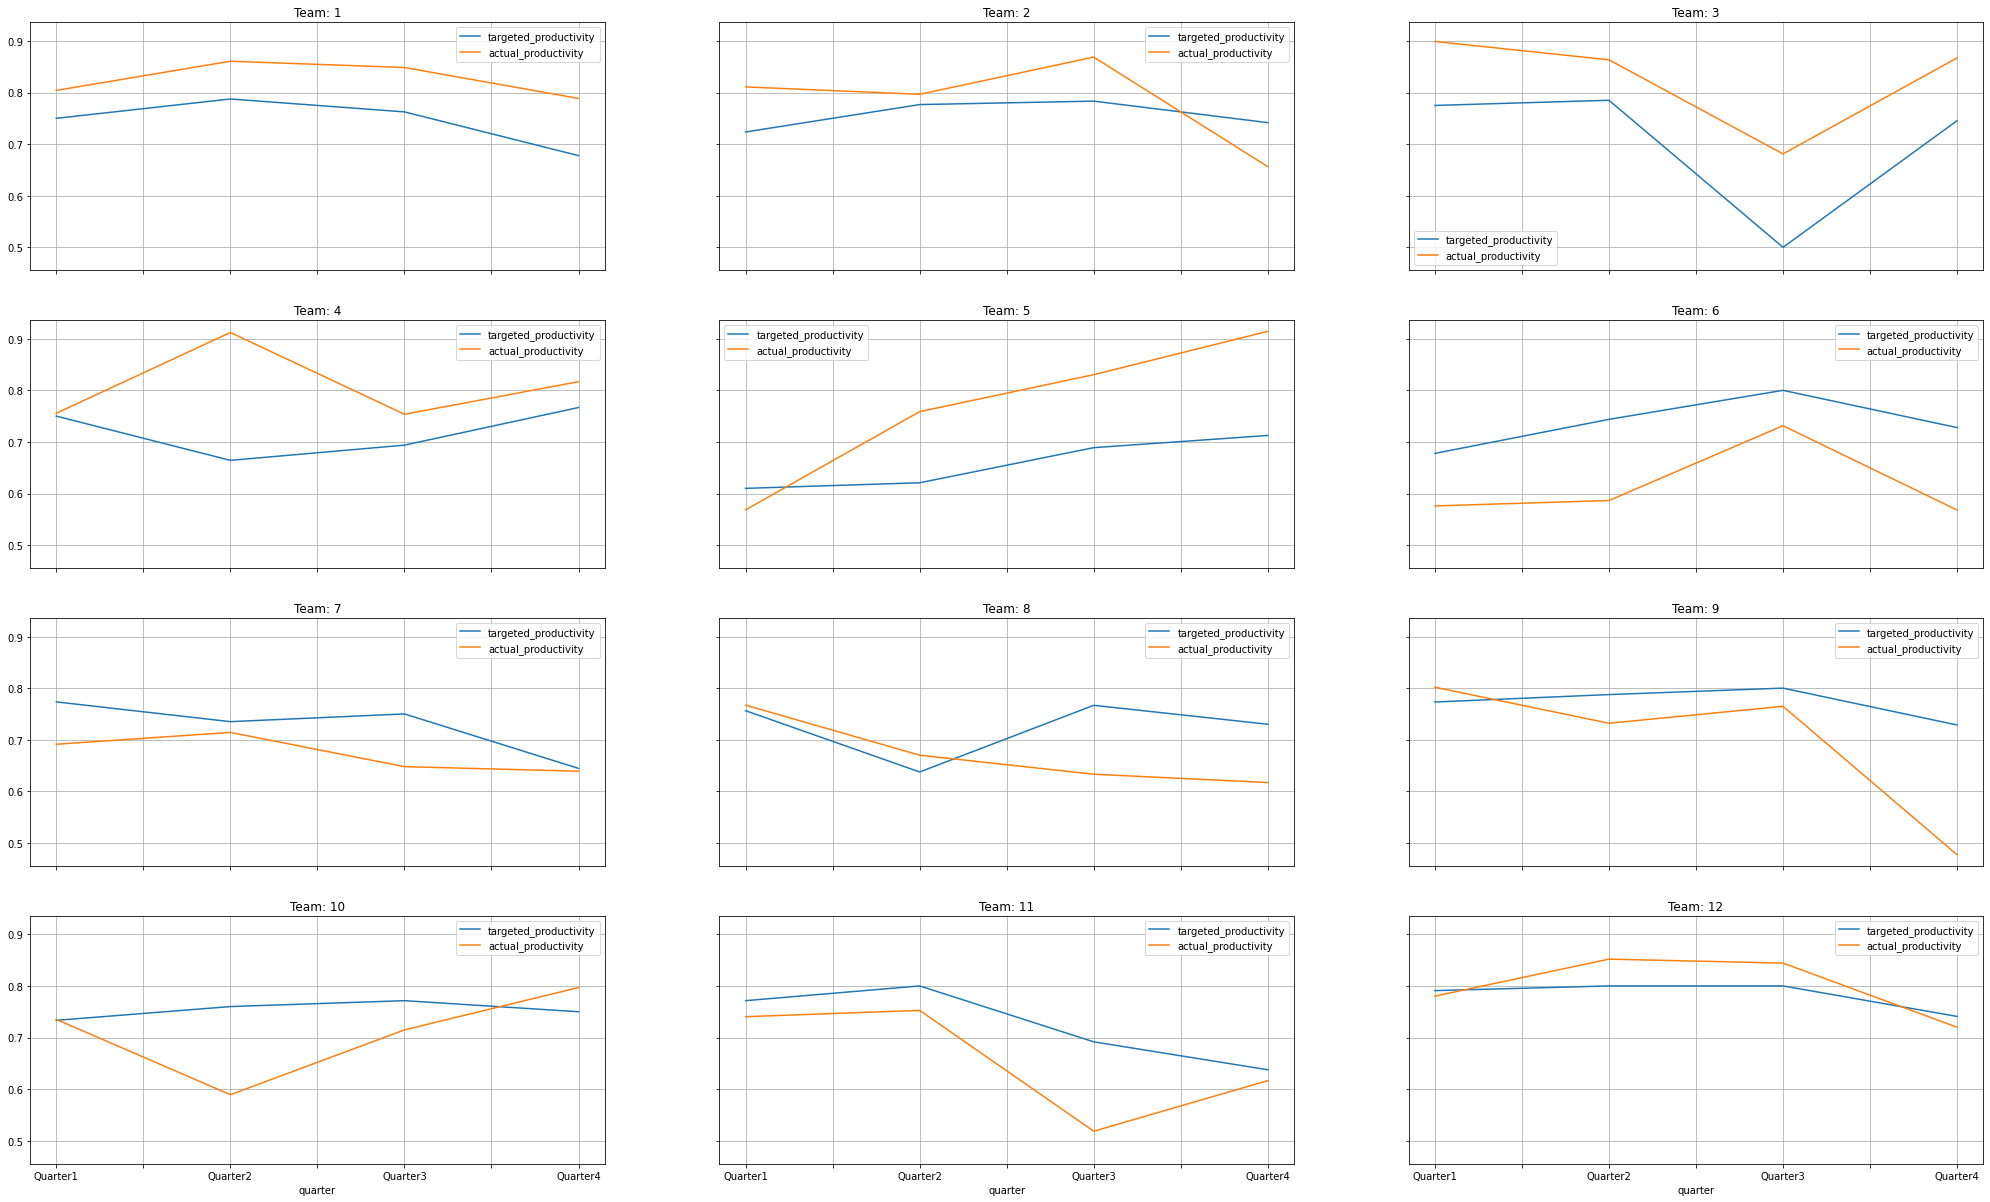

In [ ]:
fig, ax = plt.subplots(4,3, sharey=True, sharex=True)
fig.set_size_inches(35, 21, forward=True)
for team in range(1,13):
    t = df_productivity.loc[team,:]
    t.plot(ax=ax[((team-1)//3),((team-1)%3)],title='Team: '+(str)(team), grid=True)
    # print("Correlation for team",team,": ",t["targeted_productivity"].corr(t["actual_productivity"]))

In [ ]:
for ax in fig.axes:
    print(ax.yaxis.axes.get_ylim())

(0.45522852157500004, 0.936254614925)
(0.45522852157500004, 0.936254614925)
(0.45522852157500004, 0.936254614925)
(0.45522852157500004, 0.936254614925)
(0.45522852157500004, 0.936254614925)
(0.45522852157500004, 0.936254614925)
(0.45522852157500004, 0.936254614925)
(0.45522852157500004, 0.936254614925)
(0.45522852157500004, 0.936254614925)
(0.45522852157500004, 0.936254614925)
(0.45522852157500004, 0.936254614925)
(0.45522852157500004, 0.936254614925)


In [ ]:
def GetPlots(featureName, bin = [0, 5, 8, 13, 15, 18, 20, 23, 25, 30, 80]):
    
    df = data.groupby(["team","quarter"])[featureName].agg("mean")
    fig, ax = plt.subplots(4,3, sharey=True, sharex=True)
    fig.set_size_inches(35, 21, forward=True)
    for team in range(1,13):
        t = df.loc[team,:]
        t.plot(ax=ax[((team-1)//3),((team-1)%3)],
                title='Team: '+(str)(team),
                xlabel = "Quarters",
                ylabel = featureName, 
                grid=True, color = "red", legend = [featureName])
        ax2 = fig.axes[team-1].twinx()
        # ax2.set_xlim(-0.15000000000000002, 3.15)
        ax2.set_ylim(0.5, 1.0)
        df_productivity.loc[team,:].plot(ax=ax2, alpha = 0.2)

        # print("Correlation for team",team,": ",t["targeted_productivity"].corr(t["actual_productivity"]))
    
    plt.figure()
    df = data.sort_values(by="no_of_workers")
    print(df.shape)

    df['binned'] = pd.cut(df[featureName], bins=bin)
    plot1 = df.groupby("binned")["difference"].agg("mean").plot(xlabel = featureName,ylabel = "Productivity Difference", title = featureName+" v/s Productivity")
    # plt.hlines(0,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")

    ax = plt.figure()

    plot2 = df.groupby("binned")["%diff"].agg(geo_mean).plot(xlabel = featureName,ylabel = "Productivity Difference(Geometric)", title = featureName+" v/s Productivity")
    # plt.hlines(1,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")

    
    plot3 = df.groupby("binned")[["targeted_productivity",
                        "actual_productivity"]].agg("mean").plot(xlabel = featureName,
                                                                ylabel = "Productivity", 
                                                                title = featureName+" v/s Productivity")
    # plt.vlines(1+2/5,plt.ylim()[0],plt.ylim()[1], linestyles="dotted",colors="r")
    return plot1, plot2, plot3, fig

# Team Size v/s Productivity

(485, 12)


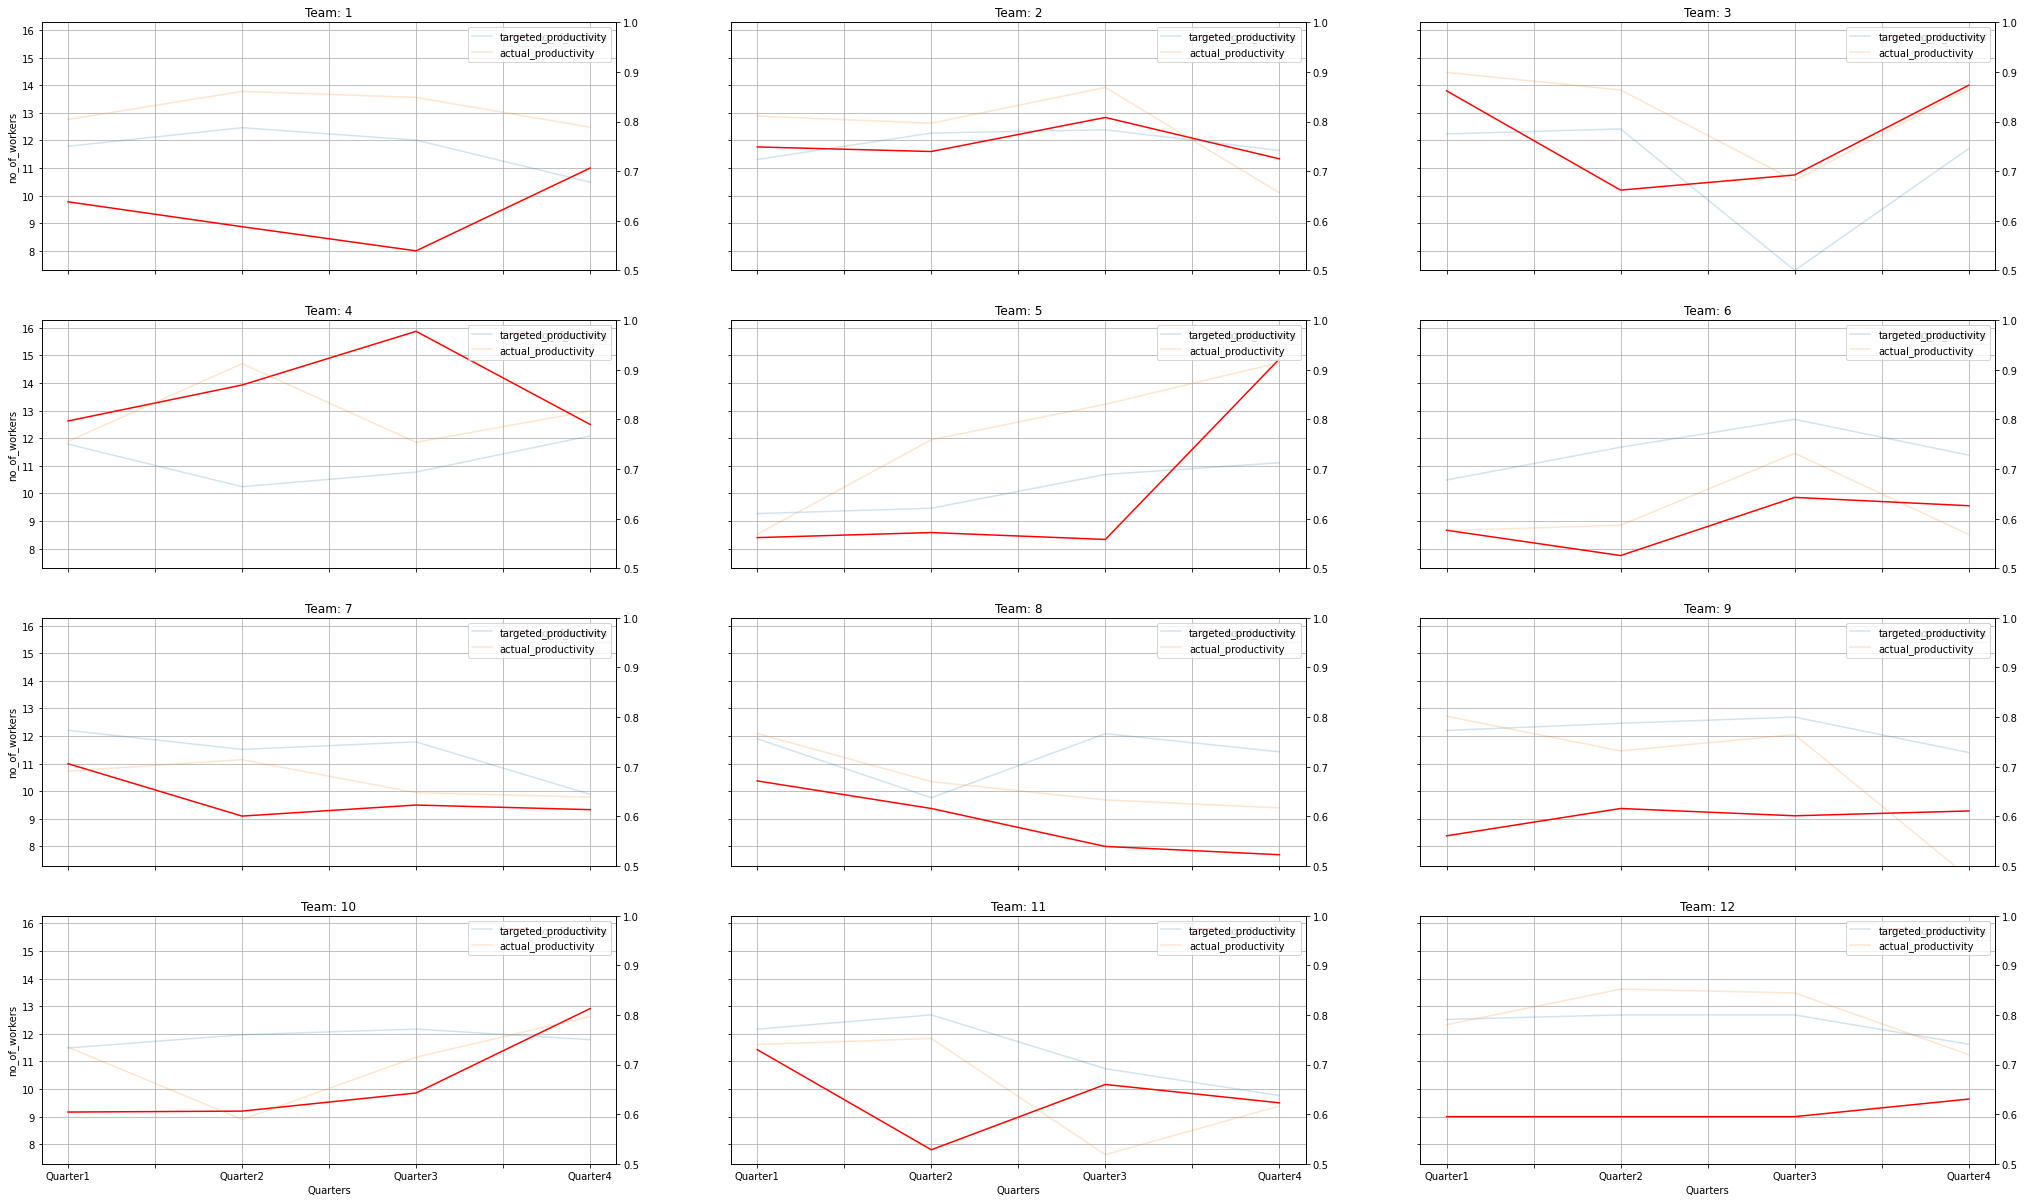

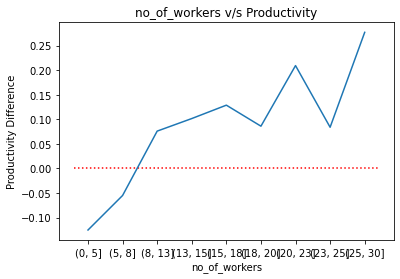

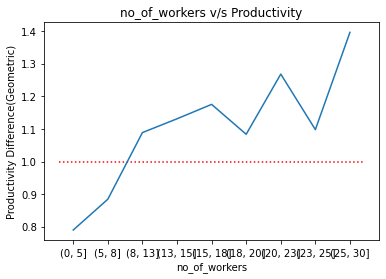

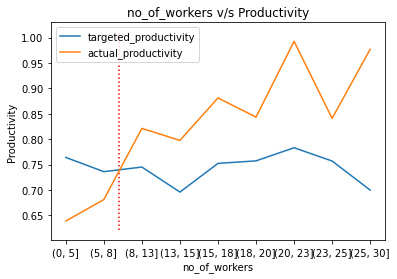

In [ ]:
meanPlot, gmeanPlot, actualvtargetproductivity, teamPlot = GetPlots("no_of_workers",[0, 5, 8, 13, 15, 18, 20, 23, 25, 30, 80])
meanPlot.hlines(0,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")
gmeanPlot.hlines(1,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")
actualvtargetproductivity.vlines(1+2/5,plt.ylim()[0],plt.ylim()[1], linestyles="dotted",colors="r")

# OverTime

(485, 12)


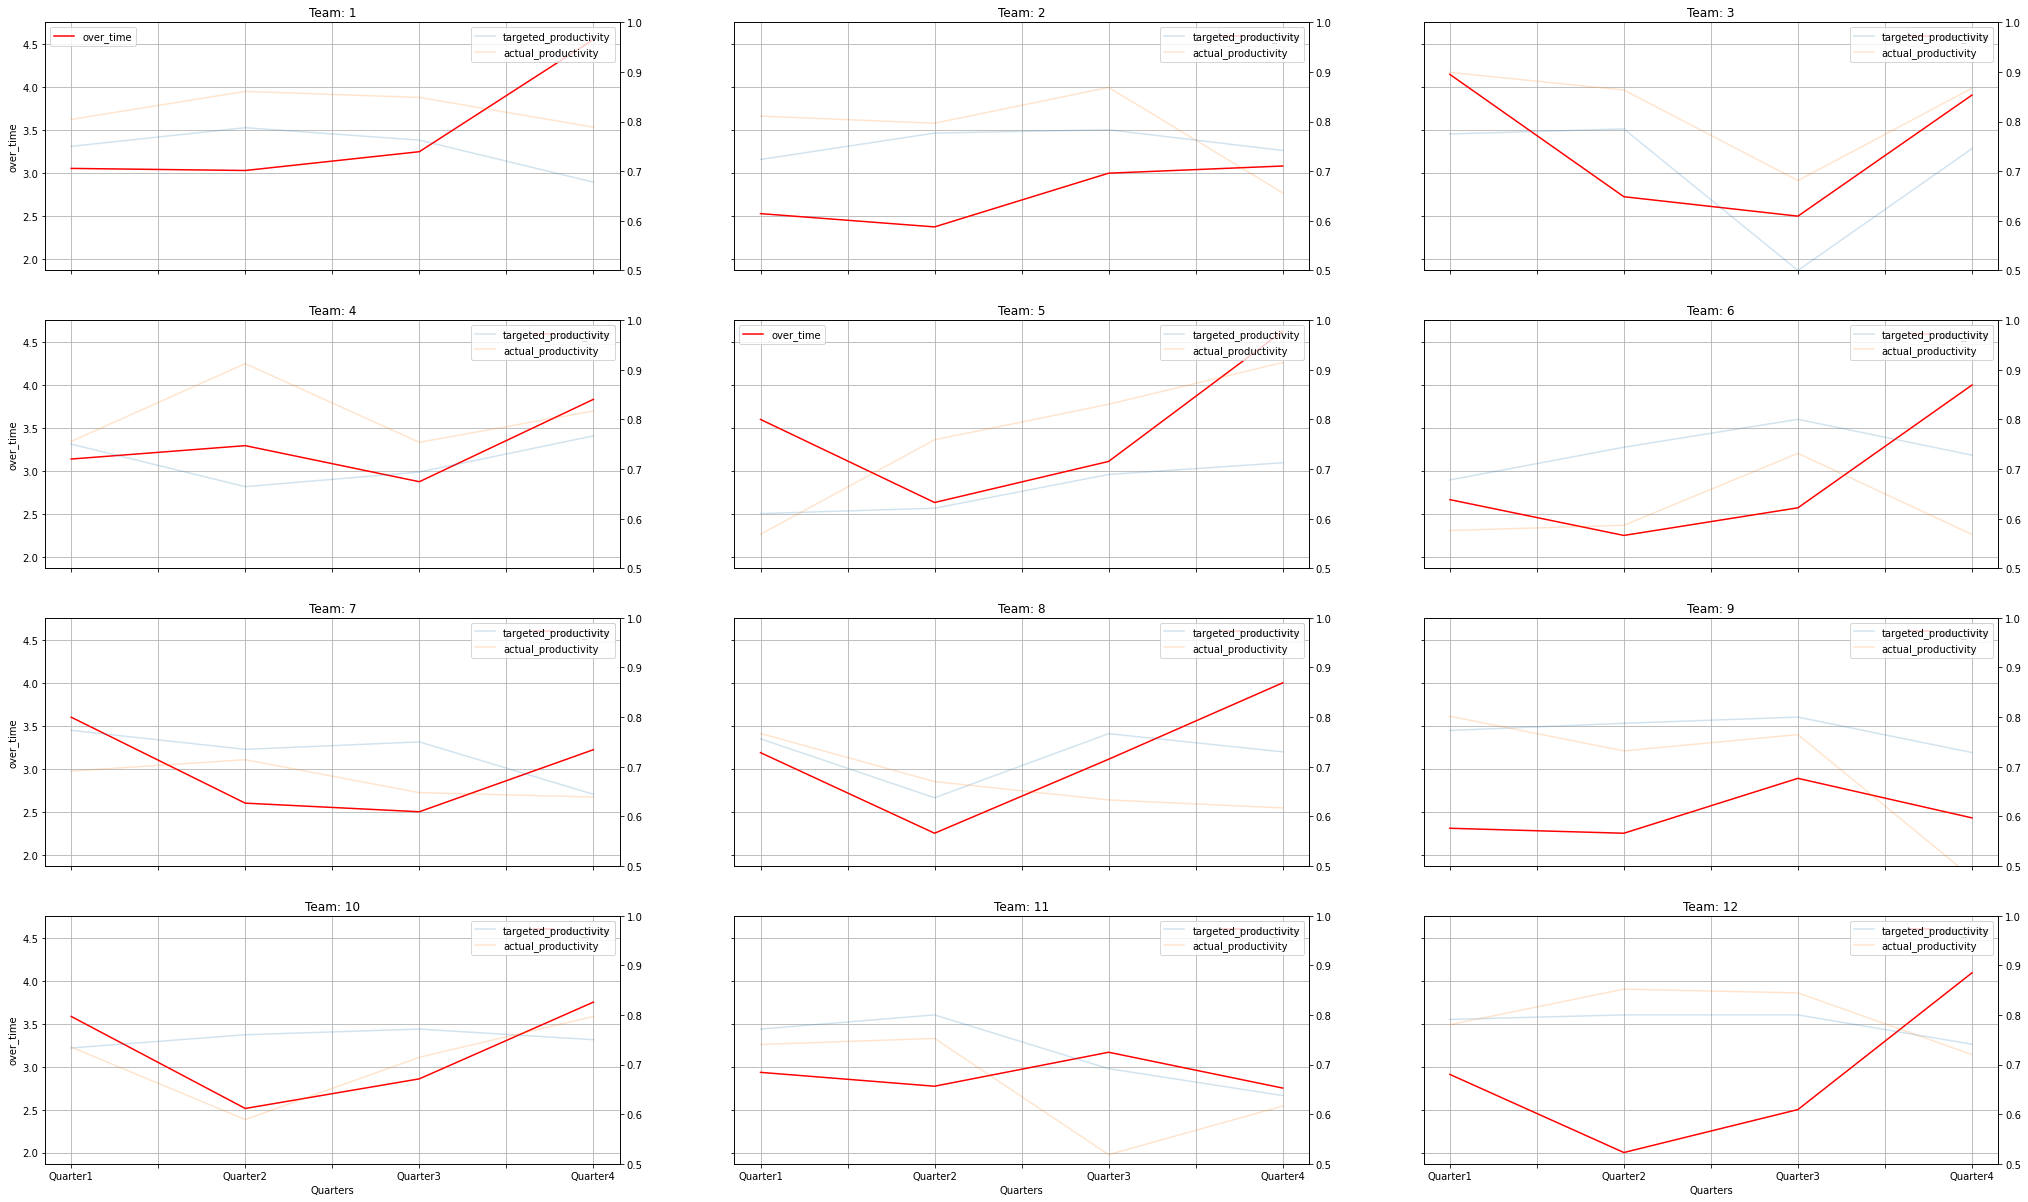

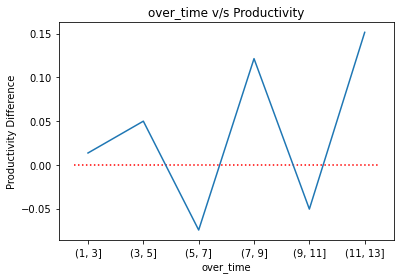

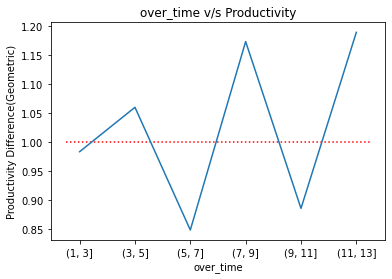

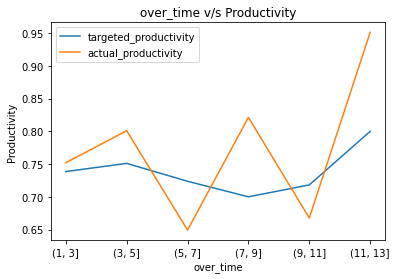

In [ ]:
meanPlot, gmeanPlot, actualvtargetproductivity, teamPlot = GetPlots("over_time",[0, 1, 3, 5, 7, 9, 11, 13])
meanPlot.hlines(0,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")
gmeanPlot.hlines(1,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")
# actualvtargetproductivity.vlines(1+2/5,plt.ylim()[0],plt.ylim()[1], linestyles="dotted",colors="r")

# SMV

(485, 12)


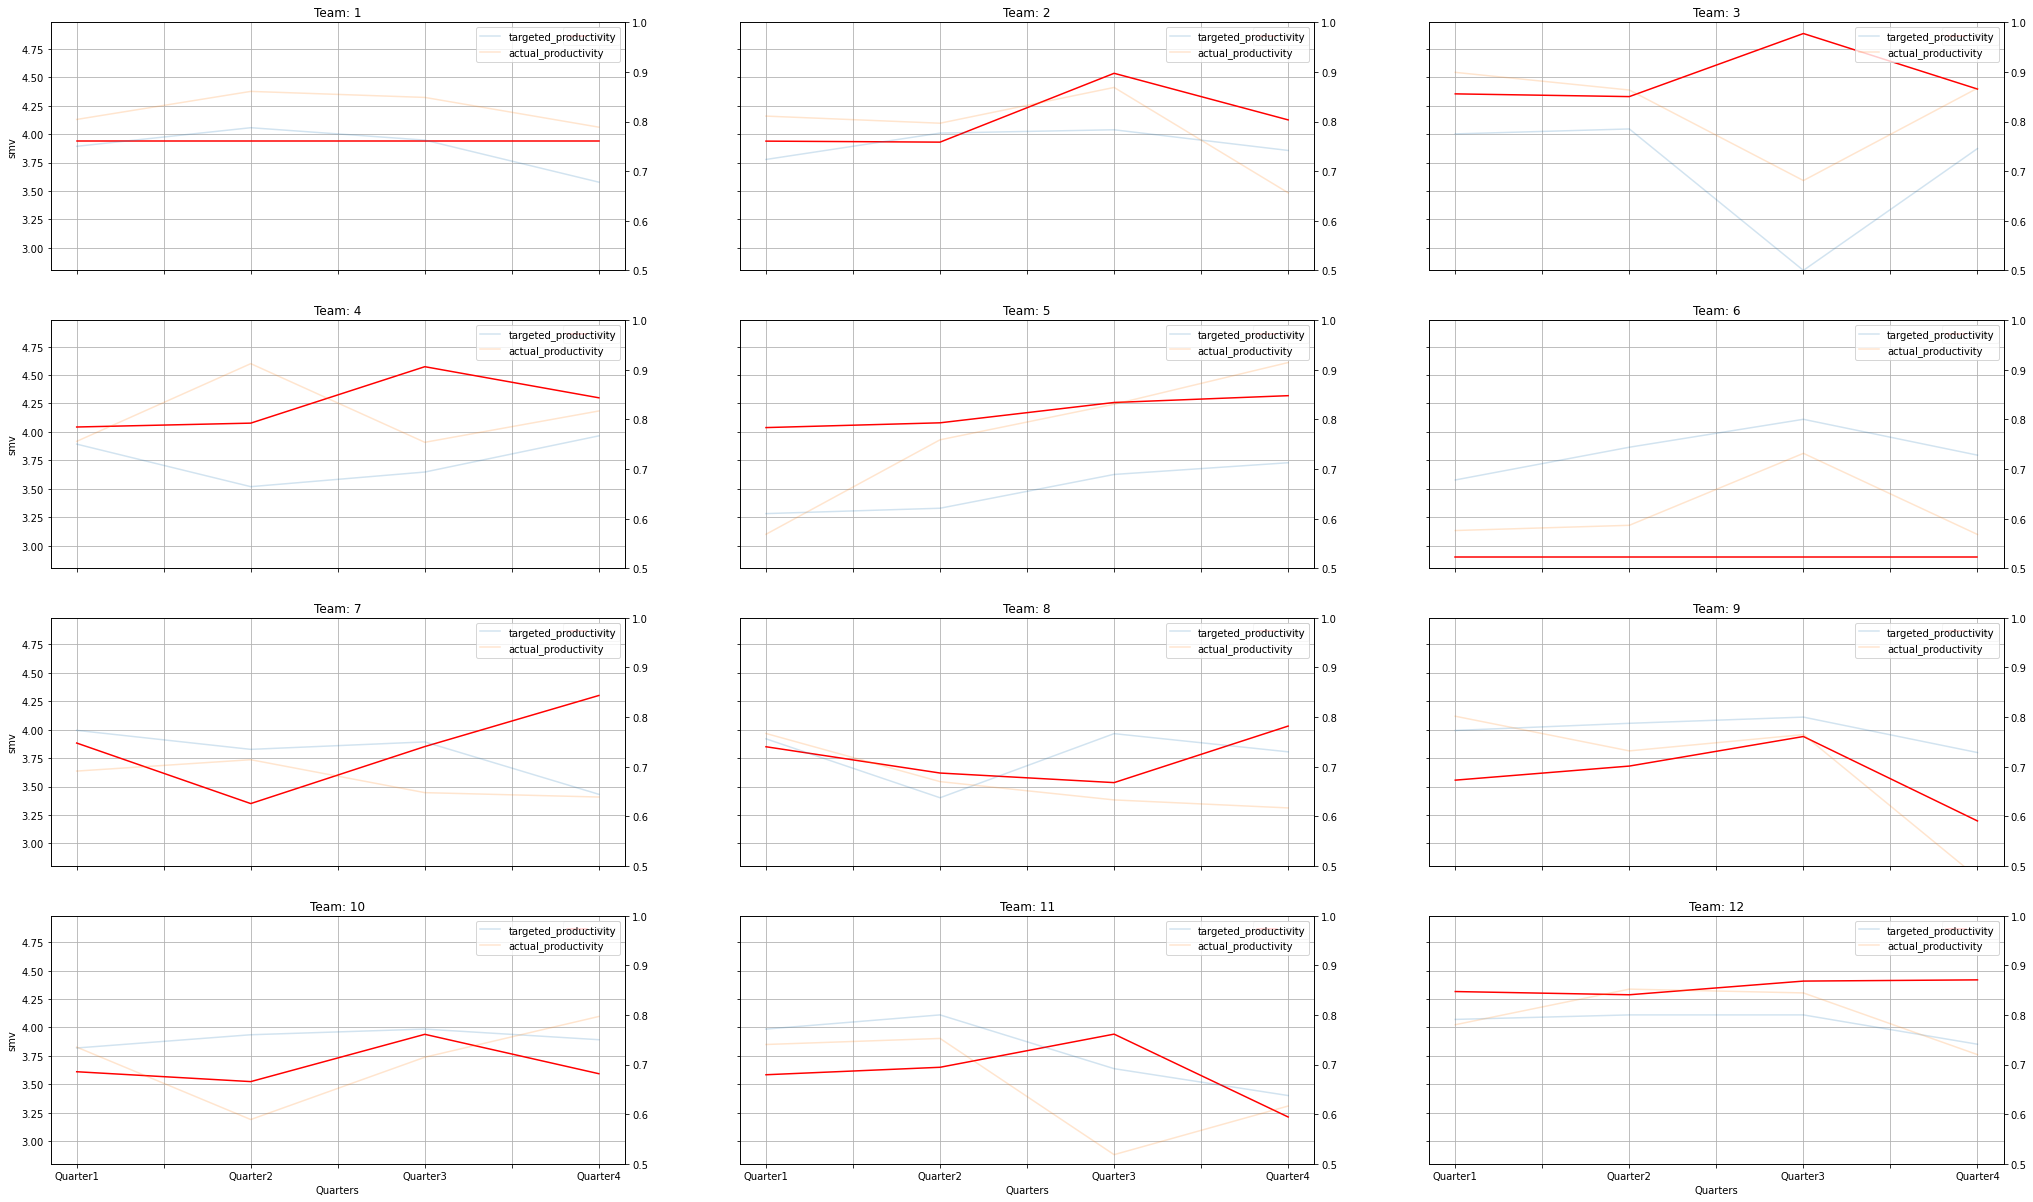

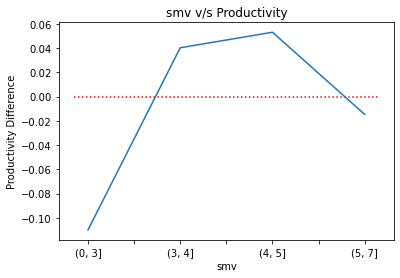

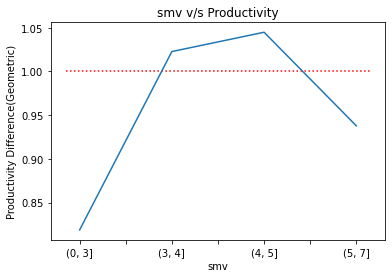

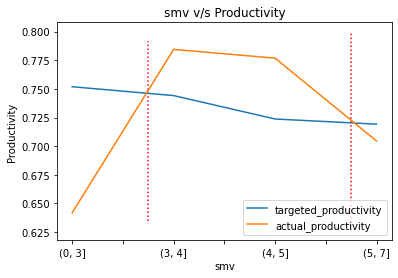

In [ ]:
meanPlot, gmeanPlot, actualvtargetproductivity, teamPlot= GetPlots("smv",[0, 3, 4, 5, 7])
meanPlot.hlines(0,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")
gmeanPlot.hlines(1,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")
actualvtargetproductivity.vlines(1-1/4,plt.ylim()[0],plt.ylim()[1], linestyles="dotted",colors="r")
actualvtargetproductivity.vlines(2.5+1/4,plt.ylim()[0],plt.ylim()[1], linestyles="dotted",colors="r")

# Incentive

In [ ]:
data["incentive"].value_counts()

0.0      475
120.0      8
240.0      2
Name: incentive, dtype: int64

(485, 12)


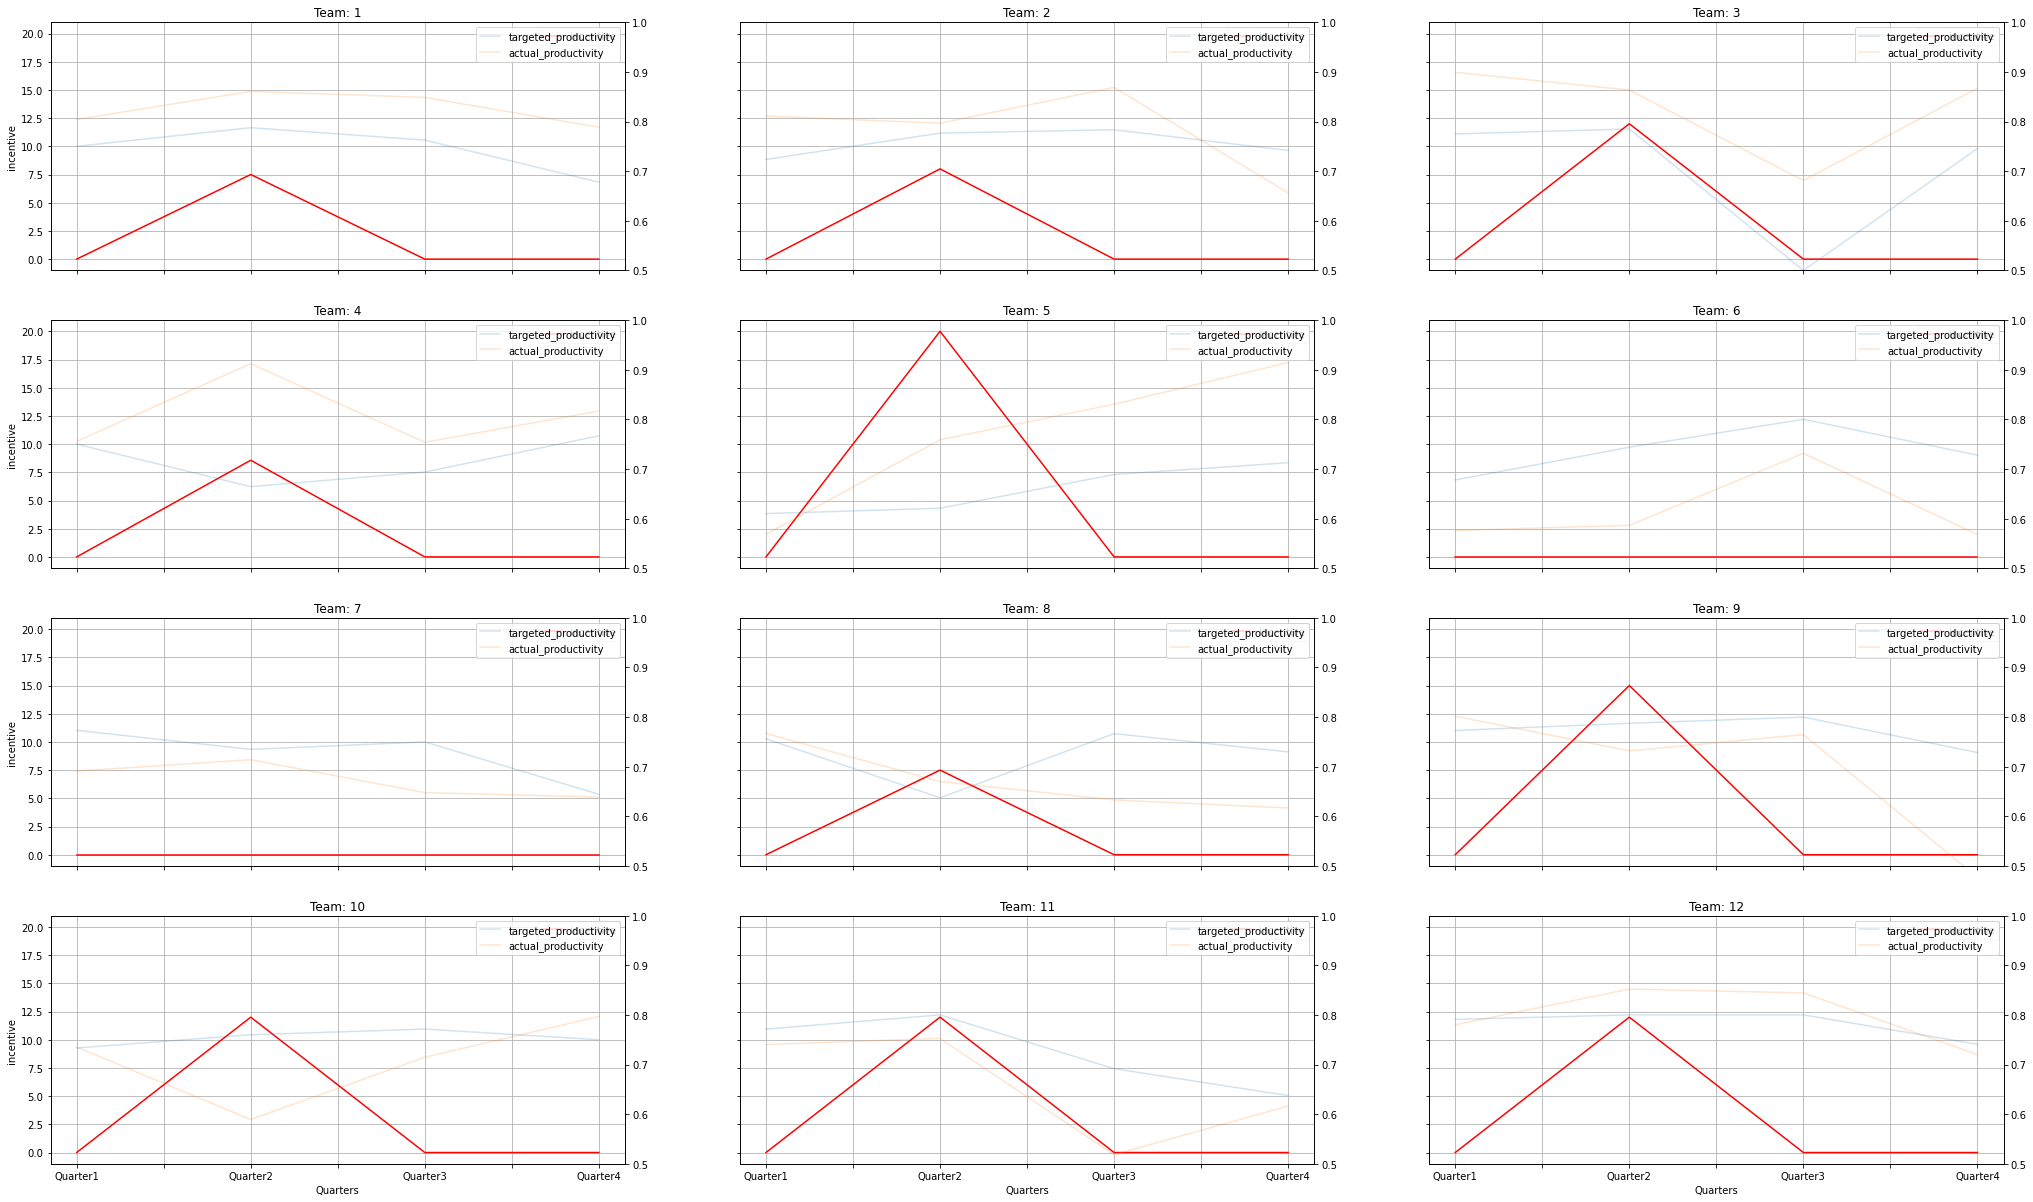

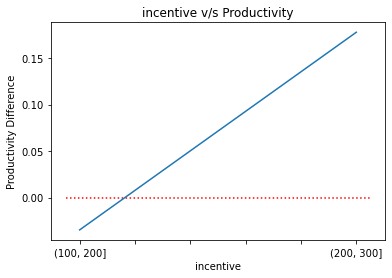

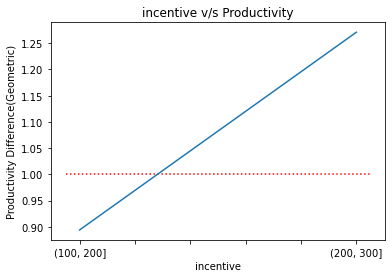

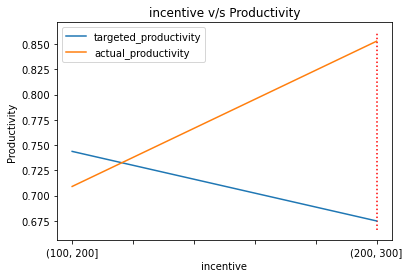

In [ ]:
meanPlot, gmeanPlot, actualvtargetproductivity, teamPlot= GetPlots("incentive",[0,100, 200, 300])
meanPlot.hlines(0,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")
gmeanPlot.hlines(1,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")
actualvtargetproductivity.vlines(1/2,plt.ylim()[0],plt.ylim()[1], linestyles="dotted",colors="r")

In [ ]:
# exit(0)

***

# End of **EDA**

***
***
***


# Team size v/s Productivity

In [ ]:
df = data.sort_values(by="no_of_workers")
print(df.shape)
df.head()

(485, 12)


,date,quarter,team,smv,over_time,incentive,no_of_workers,actual_productivity,targeted_productivity,difference,%diff,week_number
97,2015-01-13,Quarter2,1,3.94,12.0,0.0,2.0,0.951420,0.80,0.151420,1.189276,3
301,2015-02-11,Quarter2,5,4.15,2.0,0.0,2.0,0.870000,0.70,0.170000,1.242857,7
321,2015-02-15,Quarter3,5,4.15,2.0,0.0,2.0,0.760833,0.75,0.010833,1.014444,7
310,2015-02-12,Quarter2,5,4.15,2.0,0.0,2.0,0.580000,0.70,-0.120000,0.828571,7
186,2015-01-25,Quarter4,8,2.90,3.0,0.0,4.0,0.329545,0.80,-0.470455,0.411932,4


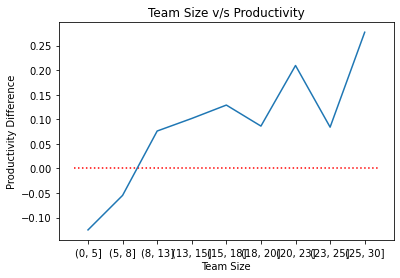

In [ ]:
bins = [0, 5, 8, 13, 15, 18, 20, 23, 25, 30, 80]
# labels = ["Under 10","10-15","15-20","20-25","25-30","30+"]
df['binned'] = pd.cut(df['no_of_workers'], bins=bins)#, labels=labels)
df.groupby("binned")["difference"].agg("mean").plot(xlabel = "Team Size",ylabel = "Productivity Difference", title = "Team Size v/s Productivity")
plt.hlines(0,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")

In [ ]:
df.groupby("binned")["%diff"].agg(geo_mean).plot(xlabel = "Team Size",ylabel = "Productivity Difference(Geometric)", title = "Team Size v/s Productivity")
plt.hlines(1,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")

Bigger Team Sizes Leads to more productive teams

In [ ]:
df.groupby("binned")[["targeted_productivity",
                        "actual_productivity"]].agg("mean").plot(xlabel = "Team Size",
                                                                ylabel = "Productivity", 
                                                                title = "Team Size v/s Productivity")
plt.vlines(1+2/5,plt.ylim()[0],plt.ylim()[1], linestyles="dotted",colors="r")

# Overtime vs Productivity

In [ ]:
df["over_time"].value_counts().sort_index()

In [ ]:
df = data.sort_values(by="no_of_workers")
print(df.shape)
df.head()

In [ ]:
bins = [0, 1, 3, 5, 7, 9, 11, 13]
# labels = ["Under 10","10-15","15-20","20-25","25-30","30+"]
df['binned'] = pd.cut(df['over_time'], bins=bins)#, labels=labels)
df.groupby("binned")["difference"].agg("mean").plot(xlabel = "Overtime(Hrs)",ylabel = "Actual Productivity(%age of Target)", title = "Overtime v/s Productivity")
plt.hlines(0,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")

In [ ]:
df.groupby("binned")["%diff"].agg(geo_mean).plot(xlabel = "Overtime(hrs)",ylabel = "Actual Productivity(%age of Target)", title = "Overtime v/s Productivity")
plt.hlines(1,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")

In [ ]:
df.groupby("binned")[["targeted_productivity",
                        "actual_productivity"]].agg("mean").plot(xlabel = "Team Size",
                                                                ylabel = "Productivity", 
                                                                title = "Team Size v/s Productivity")

In [ ]:
df = data.groupby(["team","quarter"])["no_of_workers",].agg("mean")
df.head()

In [ ]:
fig, ax = plt.subplots(4,3, sharey=True, sharex=True)
fig.set_size_inches(35, 21, forward=True)
for team in range(1,13):
    t = df.loc[team,:]
    t.plot(ax=ax[((team-1)//3),((team-1)%3)],title='Team: '+(str)(team), grid=True)
    # print("Correlation for team",team,": ",t["targeted_productivity"].corr(t["actual_productivity"]))

# SMV vs Productivity

In [ ]:
df = data.sort_values(by="no_of_workers")
print(df.shape)
df.head()

In [ ]:
df["smv"].value_counts().sort_index()

In [ ]:
bins = [0, 3, 4, 5, 7]
# labels = ["Under 10","10-15","15-20","20-25","25-30","30+"]
df['binned'] = pd.cut(df['smv'], bins=bins)#, labels=labels)
df.groupby("binned")["difference"].agg("mean").plot(xlabel = "Overtime(Hrs)",ylabel = "Actual Productivity(%age of Target)", title = "Overtime v/s Productivity")
plt.hlines(0,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")

In [ ]:
df.groupby("binned")["%diff"].agg(geo_mean).plot(xlabel = "Overtime(hrs)",ylabel = "Actual Productivity(%age of Target)", title = "Overtime v/s Productivity")
plt.hlines(1,plt.xlim()[0],plt.xlim()[1], linestyles="dotted",colors="r")

In [ ]:
df.groupby("binned")[["targeted_productivity",
                        "actual_productivity"]].agg("mean").plot(xlabel = "Team Size",
                                                                ylabel = "Productivity", 
                                                                title = "Team Size v/s Productivity")
plt.vlines(1-1/4,plt.ylim()[0],plt.ylim()[1], linestyles="dotted",colors="r")
plt.vlines(2.5+1/4,plt.ylim()[0],plt.ylim()[1], linestyles="dotted",colors="r")

In [ ]:
df_productivity.head()

In [ ]:
df = data.groupby(["team","quarter"])["over_time",].agg("mean")
df.head()

In [ ]:
fig, ax = plt.subplots(4,3, sharey=True, sharex=True)
fig.set_size_inches(35, 21, forward=True)
# ax2 = fig.axes.twiny()
for team in range(1,13):
    t = df.loc[team,:]
    t.plot(ax=ax[((team-1)//3),((team-1)%3)],title='Team: '+(str)(team), grid=True, color = "red")
    ax2 = fig.axes[team-1].twinx()
    # ax2.set_xlim(-0.15000000000000002, 3.15)
    ax2.set_ylim(0.5, 1.1)
    df_productivity.loc[team,:].plot(ax=ax2, alpha = 0.3)

     
    # print("Correlation for team",team,": ",t["targeted_productivity"].corr(t["actual_productivity"]))

# Incentive trends
## Incentive v/s Productive trend


## General Incentive Trend

## Incentive per quarter


## Incentive per quarter per team

In [ ]:
df_incentive = data.groupby(["team","quarter"])["incentive"].agg("mean")
df_incentive.head()

In [ ]:
fig, ax = plt.subplots(4,3, sharey=True, sharex=True)
fig.set_size_inches(35, 21, forward=True)
for team in range(1,13):
    t = df_incentive.loc[team,:]
    t.plot(ax=ax[((team-1)//3),((team-1)%3)],title='Team: '+(str)(team), grid=True)

## Overtime vs Incentive